## **Importando as bibliotecas e declarando funções**

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time
import math
import re
from selenium.webdriver.chrome.options import Options
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pygwalker as pyg
from sklearn.decomposition import PCA
import numpy as np

## **Fazendo o web scraping dos dados**

In [2]:
url = 'https://pt.global.nba.com/statistics/'

In [3]:
headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36 OPR/105.0.0.0"}

In [4]:
options = Options()

In [5]:
options.headless = True

In [6]:
driver = webdriver.Chrome()
driver.get(url)
time.sleep(2)

In [7]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [8]:
table = soup.find('table', class_ = 'p-datatable-table')

In [9]:
headers = table.find_all('th')

In [10]:
title = []
titles = []
for i in headers:
    title = i.get_text()
    titles.append(title)

In [13]:
print(titles)

['Rank', 'Player', 'Team', 'G', 'GS', 'PPG', 'RPG', 'APG', 'MPG', 'EFF', 'FG%', '3P%', 'FT%', 'OFF', 'DEF', 'SPG', 'BPG', 'TO', 'PF']


In [14]:
df = pd.DataFrame(columns=titles)

In [15]:
rows = table.find_all('tr')

In [16]:
data = []
for i in rows[1:]:
    data = i.find_all('td')
    row = [tr.get_text() for tr in data]
    l = len(df)
    df.loc[l] = row

## **Fazendo a análise exploratória e ajustes nos dados**

In [17]:
df.head()

,Rank,Player,Team,G,GS,PPG,RPG,APG,MPG,EFF,FG%,3P%,FT%,OFF,DEF,SPG,BPG,TO,PF
0,1,JoelEmbiid,PHI,34,34,35.3,11.3,5.7,34,39.8,53.3,36.6,88.3,2.6,8.7,1.1,1.8,3.7,2.9
1,2,LukaDoncic,DAL,64,64,33.8,9.1,9.8,37.4,36.8,48.7,37.6,78.5,0.8,8.3,1.5,0.5,4,2.1
2,3,GiannisAntetokounmpo,MIL,69,69,30.8,11.5,6.4,35.2,36.6,61.4,28.6,65.9,2.7,8.8,1.2,1,3.4,2.9
3,4,ShaiGilgeous-Alexander,OKC,70,70,30.4,5.6,6.3,34.4,32.9,54.0,36.7,87.1,0.9,4.7,2.1,0.9,2.2,2.5
4,5,JalenBrunson,NYK,68,68,27.9,3.6,6.5,35.1,24.9,47.9,40.1,84.7,0.6,3,0.9,0.2,2.4,1.9


In [18]:
df.shape

(50, 19)

In [19]:
driver.quit()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    50 non-null     object
 1   Player  50 non-null     object
 2   Team    50 non-null     object
 3   G       50 non-null     object
 4   GS      50 non-null     object
 5   PPG     50 non-null     object
 6   RPG     50 non-null     object
 7   APG     50 non-null     object
 8   MPG     50 non-null     object
 9   EFF     50 non-null     object
 10  FG%     50 non-null     object
 11  3P%     50 non-null     object
 12  FT%     50 non-null     object
 13  OFF     50 non-null     object
 14  DEF     50 non-null     object
 15  SPG     50 non-null     object
 16  BPG     50 non-null     object
 17  TO      50 non-null     object
 18  PF      50 non-null     object
dtypes: object(19)
memory usage: 7.8+ KB


In [21]:
for x in ['Rank', 'G', 'GS', 'PPG', 'RPG', 'APG', 'MPG', 'EFF', 'FG%', '3P%', 'FT%', 'OFF', 'DEF', 'SPG', 'BPG', 'TO', 'PF']:
    df[x] = pd.to_numeric(df[x])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    50 non-null     int64  
 1   Player  50 non-null     object 
 2   Team    50 non-null     object 
 3   G       50 non-null     int64  
 4   GS      50 non-null     int64  
 5   PPG     50 non-null     float64
 6   RPG     50 non-null     float64
 7   APG     50 non-null     float64
 8   MPG     50 non-null     float64
 9   EFF     50 non-null     float64
 10  FG%     50 non-null     float64
 11  3P%     50 non-null     float64
 12  FT%     50 non-null     float64
 13  OFF     50 non-null     float64
 14  DEF     50 non-null     float64
 15  SPG     50 non-null     float64
 16  BPG     50 non-null     float64
 17  TO      50 non-null     float64
 18  PF      50 non-null     float64
dtypes: float64(14), int64(3), object(2)
memory usage: 7.8+ KB


In [23]:
df.describe()

,Rank,G,GS,PPG,RPG,APG,MPG,EFF,FG%,3P%,FT%,OFF,DEF,SPG,BPG,TO,PF
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,59.680000,59.300000,24.172000,6.206000,5.422000,34.1920,24.720000,48.360000,36.450000,82.582000,1.142000,5.070000,1.098000,0.678000,2.578000,2.204000
std,14.57738,13.265638,13.448693,3.400423,2.422127,2.090824,1.9303,5.232161,4.351823,3.628248,6.360711,0.754602,1.821779,0.368389,0.605852,0.689954,0.604054
min,1.00000,9.000000,9.000000,20.000000,2.700000,1.900000,29.2000,16.600000,42.600000,27.500000,65.900000,0.400000,2.300000,0.500000,0.100000,1.400000,1.100000
25%,13.25000,54.000000,52.500000,21.825000,4.425000,3.625000,32.8500,21.750000,45.325000,34.775000,79.875000,0.600000,3.800000,0.825000,0.325000,2.100000,1.800000
50%,25.50000,64.000000,64.000000,23.300000,5.400000,5.200000,34.4000,23.800000,47.300000,36.500000,84.100000,0.900000,4.600000,1.000000,0.500000,2.550000,2.100000
75%,37.75000,68.750000,68.750000,26.175000,7.250000,6.375000,35.3750,26.125000,50.500000,39.550000,86.725000,1.450000,6.125000,1.200000,0.700000,2.975000,2.575000
max,50.00000,74.000000,74.000000,35.300000,12.700000,11.000000,37.6000,39.800000,61.400000,42.500000,92.300000,3.200000,9.500000,2.100000,3.400000,4.300000,3.600000


(array([23., 14.,  9.,  2.,  2.]),
 array([20.  , 23.06, 26.12, 29.18, 32.24, 35.3 ]),
 <BarContainer object of 5 artists>)

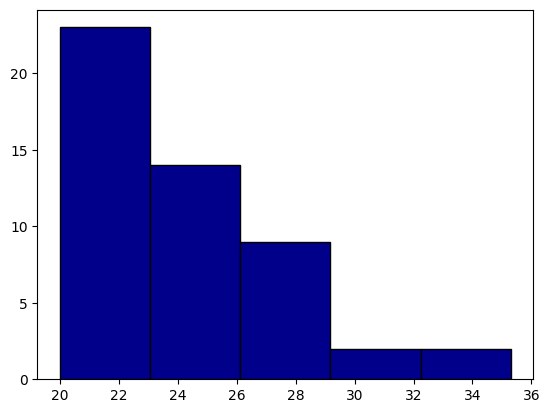

In [24]:
plt.hist(df['PPG'], bins=5, color='darkblue', edgecolor='black')

<Axes: xlabel='DEF', ylabel='RPG'>

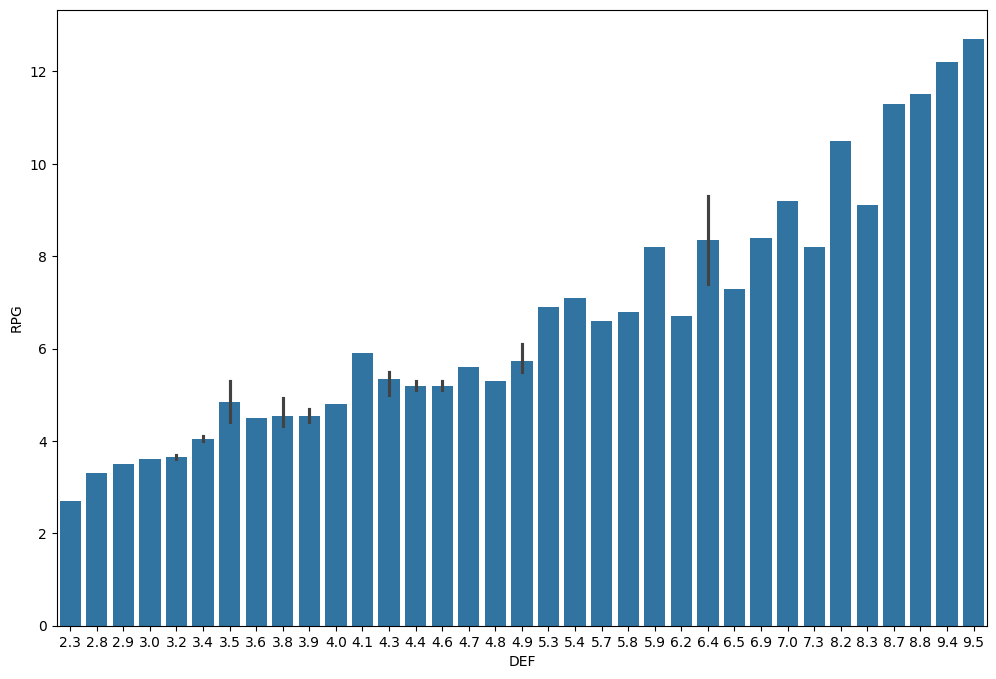

In [25]:
plt.figure(figsize=[12,8])
sns.barplot(x = 'DEF', y = 'RPG', data=df)

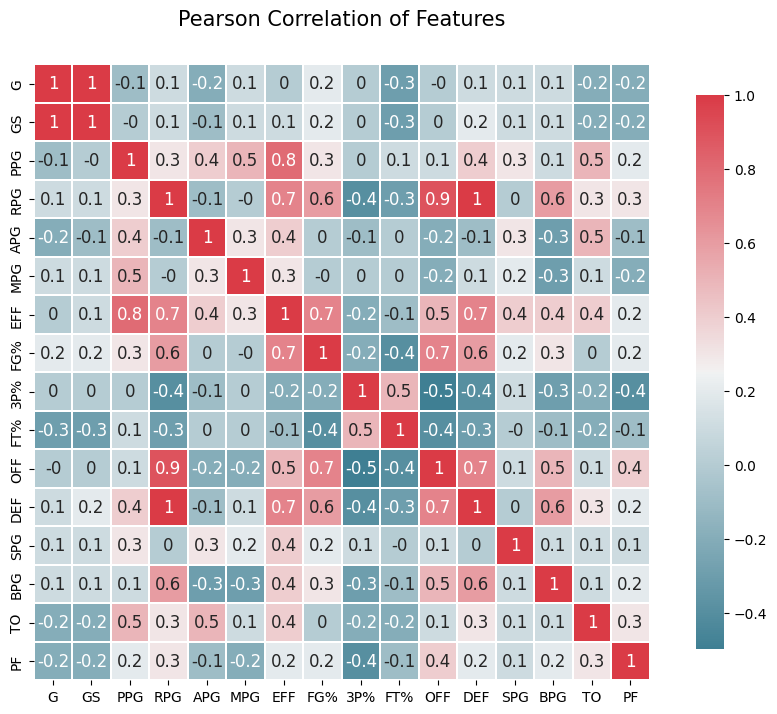

In [26]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        round(df.corr(),1), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df[['G', 'GS', 'PPG', 'RPG', 'APG', 'MPG', 'EFF', 'FG%', '3P%', 'FT%', 'OFF', 'DEF', 'SPG', 'BPG', 'TO', 'PF']])

In [27]:
df_novo = df[['GS', 'PPG', 'APG', 'MPG', 'EFF', 'FG%', '3P%', 'FT%', 'OFF', 'DEF', 'SPG', 'BPG', 'TO', 'PF']]

In [28]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-000614fdf9eb7223h0T9nBWFKMIL5zvD" style="height: auto">\n    <head>…

In [29]:
df_novo.head()

,GS,PPG,APG,MPG,EFF,FG%,3P%,FT%,OFF,DEF,SPG,BPG,TO,PF
0,34,35.3,5.7,34.0,39.8,53.3,36.6,88.3,2.6,8.7,1.1,1.8,3.7,2.9
1,64,33.8,9.8,37.4,36.8,48.7,37.6,78.5,0.8,8.3,1.5,0.5,4.0,2.1
2,69,30.8,6.4,35.2,36.6,61.4,28.6,65.9,2.7,8.8,1.2,1.0,3.4,2.9
3,70,30.4,6.3,34.4,32.9,54.0,36.7,87.1,0.9,4.7,2.1,0.9,2.2,2.5
4,68,27.9,6.5,35.1,24.9,47.9,40.1,84.7,0.6,3.0,0.9,0.2,2.4,1.9


In [30]:
X = np.asarray(df_novo)

In [31]:
X

array([[34. , 35.3,  5.7, 34. , 39.8, 53.3, 36.6, 88.3,  2.6,  8.7,  1.1,
         1.8,  3.7,  2.9],
       [64. , 33.8,  9.8, 37.4, 36.8, 48.7, 37.6, 78.5,  0.8,  8.3,  1.5,
         0.5,  4. ,  2.1],
       [69. , 30.8,  6.4, 35.2, 36.6, 61.4, 28.6, 65.9,  2.7,  8.8,  1.2,
         1. ,  3.4,  2.9],
       [70. , 30.4,  6.3, 34.4, 32.9, 54. , 36.7, 87.1,  0.9,  4.7,  2.1,
         0.9,  2.2,  2.5],
       [68. , 27.9,  6.5, 35.1, 24.9, 47.9, 40.1, 84.7,  0.6,  3. ,  0.9,
         0.2,  2.4,  1.9],
       [67. , 27.6,  5.2, 37.1, 28.5, 53. , 42.5, 85.4,  0.5,  6.2,  0.9,
         1.3,  3.3,  1.7],
       [69. , 27.3,  4.9, 35.9, 28. , 47.4, 37.9, 83.2,  0.9,  7.3,  1. ,
         0.6,  2.6,  2. ],
       [50. , 27.1,  6.1, 35.3, 26.4, 46.6, 36.9, 86.3,  0.9,  4.4,  1.8,
         0.5,  2.8,  2.2],
       [60. , 27. ,  6.9, 35.7, 26.8, 49.2, 36.2, 88.1,  0.8,  4. ,  0.9,
         0.4,  2.5,  3.1],
       [67. , 26.5,  5. , 32.7, 22.9, 44.8, 40.2, 92.3,  0.5,  3.8,  0.7,
         0.3,  2.

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

In [33]:
pca.fit(X)

PCA(n_components=6)

In [34]:
pca.components_[0]

array([-0.98100647,  0.0042989 ,  0.02153753, -0.01955712, -0.03888092,
       -0.09297463,  0.0032291 ,  0.1600195 , -0.00449706, -0.02813176,
       -0.00293053, -0.00603762,  0.00858964,  0.00763903])

% da variabilidade dos dados explicada

In [35]:
np.round(pca.explained_variance_ratio_,2)

array([0.61, 0.17, 0.13, 0.03, 0.03, 0.01])

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.60931263, 0.78344832, 0.90845921, 0.9434199 , 0.97037368,
       0.98158411])

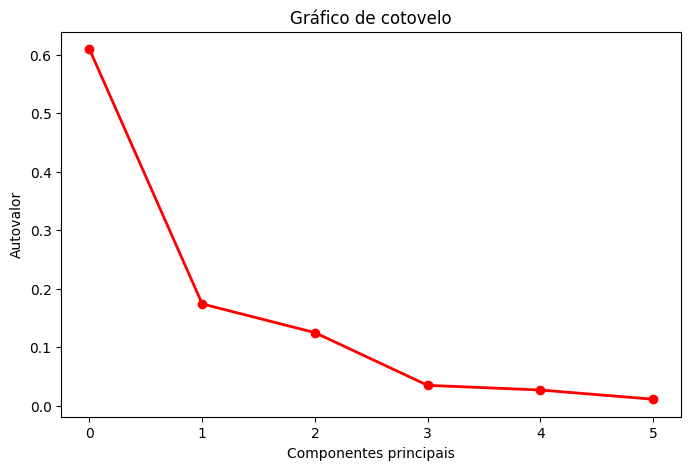

In [37]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Gráfico de cotovelo')
plt.xlabel('Componentes principais')
plt.ylabel('Autovalor')

plt.show()

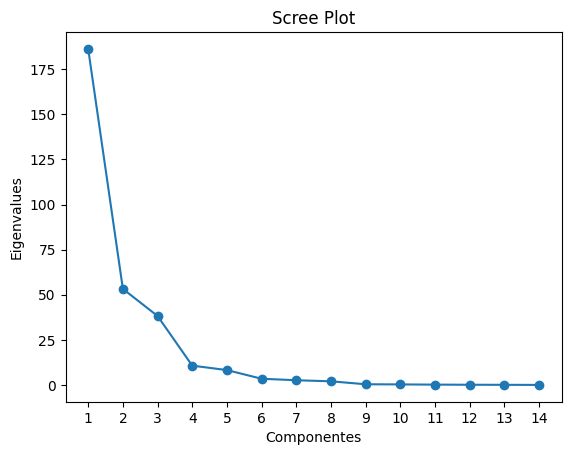

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculando a matriz de covariância
cov_matrix = np.cov(df_novo, rowvar=False)

# Calculando os autovalores
eigenvalues = np.linalg.eigvals(cov_matrix)

# Ordenando os autovalores em ordem decrescente
eigenvalues = np.sort(eigenvalues)[::-1]

# Número de componentes
num_components = len(eigenvalues)

# Índices dos componentes
components = np.arange(1, num_components + 1)

# Plotando o scree plot
plt.plot(components, eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Componentes')
plt.ylabel('Eigenvalues')
plt.xticks(components)
plt.show()


In [39]:
autovalores = pca.explained_variance_

# Imprimir os autovalores
for i, autovalor in enumerate(autovalores):
    print(f'Autovalor do Componente Principal {i+1}: {autovalor}')


Autovalor do Componente Principal 1: 186.2647529977467
Autovalor do Componente Principal 2: 53.23267256292089
Autovalor do Componente Principal 3: 38.21539599080606
Autovalor do Componente Principal 4: 10.687361994481664
Autovalor do Componente Principal 5: 8.239675878439886
Autovalor do Componente Principal 6: 3.4269902395025955


In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

In [41]:
pca.fit(X)

PCA(n_components=4)

In [42]:
pca.components_

array([[-0.98100647,  0.0042989 ,  0.02153753, -0.01955712, -0.03888092,
        -0.09297463,  0.0032291 ,  0.1600195 , -0.00449706, -0.02813176,
        -0.00293053, -0.00603762,  0.00858964,  0.00763903],
       [-0.15611264,  0.24765377,  0.08186051,  0.03222761,  0.5537839 ,
         0.45723861, -0.2588468 , -0.53568168,  0.06875367,  0.17013205,
         0.01099498,  0.02733457,  0.04059472,  0.02585401],
       [ 0.08313035,  0.35199339,  0.10501725,  0.10216158,  0.51620635,
         0.1306546 ,  0.24799624,  0.70605271, -0.00214836,  0.06026578,
         0.0165295 ,  0.0110226 ,  0.00853179, -0.00825232],
       [-0.05724001, -0.32861655, -0.27700045, -0.279085  , -0.10370512,
         0.66355765,  0.51936989,  0.02208645,  0.06113249,  0.02058625,
        -0.01225276,  0.02357555, -0.08885942, -0.00759954]])

In [43]:
colunas = df_novo.columns

In [45]:
colunas

Index(['GS', 'PPG', 'APG', 'MPG', 'EFF', 'FG%', '3P%', 'FT%', 'OFF', 'DEF',
       'SPG', 'BPG', 'TO', 'PF'],
      dtype='object')

In [46]:
componente_1 = pca.components_[0]
componente_2 = pca.components_[1]
componente_3 = pca.components_[2]
componente_4 = pca.components_[3]


In [47]:
tipo_variavel = ['jogo', 'ataque', 'ataque', 'jogo', 'ataque', 'ataque', 'ataque', 'ataque', 'ataque', 'defesa', 'defesa', 'defesa', 'defesa', 'defesa']

In [48]:
data = {coluna: [componente_1[i], componente_2[i], componente_3[i], componente_4[i], tipo_variavel[i]] for i, coluna in enumerate(colunas)}


In [49]:
df_components = pd.DataFrame(data)
df_components.head()

,GS,PPG,APG,MPG,EFF,FG%,3P%,FT%,OFF,DEF,SPG,BPG,TO,PF
0,-0.981006,0.004299,0.021538,-0.019557,-0.038881,-0.092975,0.003229,0.16002,-0.004497,-0.028132,-0.002931,-0.006038,0.00859,0.007639
1,-0.156113,0.247654,0.081861,0.032228,0.553784,0.457239,-0.258847,-0.535682,0.068754,0.170132,0.010995,0.027335,0.040595,0.025854
2,0.08313,0.351993,0.105017,0.102162,0.516206,0.130655,0.247996,0.706053,-0.002148,0.060266,0.016529,0.011023,0.008532,-0.008252
3,-0.05724,-0.328617,-0.277,-0.279085,-0.103705,0.663558,0.51937,0.022086,0.061132,0.020586,-0.012253,0.023576,-0.088859,-0.0076
4,jogo,ataque,ataque,jogo,ataque,ataque,ataque,ataque,ataque,defesa,defesa,defesa,defesa,defesa


% da variabilidade dos dados explicada

In [50]:
autovalores = pca.explained_variance_

# Imprimir os autovalores
for i, autovalor in enumerate(autovalores):
    print(f'Autovalor do Componente Principal {i+1}: {autovalor}')


Autovalor do Componente Principal 1: 186.2647529977467
Autovalor do Componente Principal 2: 53.23267256292089
Autovalor do Componente Principal 3: 38.21539599080606
Autovalor do Componente Principal 4: 10.687361994481664


In [51]:
np.round(pca.explained_variance_ratio_,2)

array([0.61, 0.17, 0.13, 0.03])

In [52]:
pca.explained_variance_ratio_.cumsum()

array([0.60931263, 0.78344832, 0.90845921, 0.9434199 ])

In [53]:
pca.transform(X)

array([[ 24.64640052,  15.04213074,  14.55946071,  -0.22850028],
       [ -5.76657852,  11.42720606,   8.46355515,  -6.15009417],
       [-13.95681129,  24.55223218,  -2.31586306,  -0.21020662],
       [-10.56756653,   4.50422179,  11.39813289,   0.1653232 ],
       [ -8.06650797,  -2.92719794,   4.54372132,  -0.72297365],
       [ -7.73829308,   1.04096424,   8.25142219,   3.51477799],
       [ -9.5439183 ,   0.29893029,   4.52504035,  -2.09558541],
       [  9.84443193,   0.16679353,   3.78760858,  -2.01422301],
       [  0.0910747 ,  -0.78988604,   6.30221627,  -1.51289084],
       [ -5.51536407,  -9.80176412,   7.57055707,  -0.76829029],
       [ -6.864133  ,   3.12503318,  -6.1418445 ,  -2.97642625],
       [  9.32956734,  -2.36624913,   2.42879393,  -6.10736363],
       [ -9.24405145,  -2.73954219,   1.14352349,  -2.66040191],
       [-12.93739658,  12.09206835,   9.99386562,   1.7401378 ],
       [ -4.56079058,  -5.55952978,   3.02019767,  -3.78289641],
       [  9.266469  ,  -3

In [54]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]
PCA3 = pca.transform(X)[:,2]

In [55]:
df['PCA1'] = PCA1
df['PCA2'] = PCA2
df['PCA3'] = PCA3


In [56]:
df.columns

Index(['Rank', 'Player', 'Team', 'G', 'GS', 'PPG', 'RPG', 'APG', 'MPG', 'EFF',
       'FG%', '3P%', 'FT%', 'OFF', 'DEF', 'SPG', 'BPG', 'TO', 'PF', 'PCA1',
       'PCA2', 'PCA3'],
      dtype='object')

In [57]:
df.head()

,Rank,Player,Team,G,GS,PPG,RPG,APG,MPG,EFF,...,FT%,OFF,DEF,SPG,BPG,TO,PF,PCA1,PCA2,PCA3
0,1,JoelEmbiid,PHI,34,34,35.3,11.3,5.7,34.0,39.8,...,88.3,2.6,8.7,1.1,1.8,3.7,2.9,24.646401,15.042131,14.559461
1,2,LukaDoncic,DAL,64,64,33.8,9.1,9.8,37.4,36.8,...,78.5,0.8,8.3,1.5,0.5,4.0,2.1,-5.766579,11.427206,8.463555
2,3,GiannisAntetokounmpo,MIL,69,69,30.8,11.5,6.4,35.2,36.6,...,65.9,2.7,8.8,1.2,1.0,3.4,2.9,-13.956811,24.552232,-2.315863
3,4,ShaiGilgeous-Alexander,OKC,70,70,30.4,5.6,6.3,34.4,32.9,...,87.1,0.9,4.7,2.1,0.9,2.2,2.5,-10.567567,4.504222,11.398133
4,5,JalenBrunson,NYK,68,68,27.9,3.6,6.5,35.1,24.9,...,84.7,0.6,3.0,0.9,0.2,2.4,1.9,-8.066508,-2.927198,4.543721


In [58]:
df_R = pd.read_csv("C:\\Users\\henri\\OneDrive\\Documents\\Faculdade\\TCC\\base_R.csv")

In [59]:
df_R.head()

,Factor 1,Factor 2,Factor 3,Factor 4
0,-2.711542,-2.009566,2.047661,0.030818
1,0.008287,-3.047638,-0.266835,0.226158
2,-0.970478,-1.525334,-0.158793,-1.711100
3,-1.215066,-1.262615,-1.555300,1.805457
4,-0.187113,-1.003708,-0.309952,-1.008190


In [60]:
df_final = pd.concat([df['Player'], df_R], axis=1)

In [61]:
df_final

,Player,Factor 1,Factor 2,Factor 3,Factor 4
0,JoelEmbiid,-2.711542,-2.009566,2.047661,0.030818
1,LukaDoncic,0.008287,-3.047638,-0.266835,0.226158
2,GiannisAntetokounmpo,-0.970478,-1.525334,-0.158793,-1.711100
3,ShaiGilgeous-Alexander,-1.215066,-1.262615,-1.555300,1.805457
4,JalenBrunson,-0.187113,-1.003708,-0.309952,-1.008190
5,KevinDurant,0.177073,-0.929915,0.620683,-0.411871
6,JaysonTatum,0.284531,-0.822306,0.487723,-0.354050
7,DonovanMitchell,0.863843,-0.560001,-0.342480,-0.729934
8,DevinBooker,0.920524,-0.303296,-0.642562,0.575097
9,StephenCurry,-0.173465,-0.536514,-0.508424,-0.639195


In [62]:
df_final.nlargest(3, 'Factor 1')

,Player,Factor 1,Factor 2,Factor 3,Factor 4
12,AnthonyEdwards,1.826521,-1.724311,0.909009,0.812203
32,PaulGeorge,1.094440,-0.061378,0.783124,0.726336
27,ZionWilliamson,1.045632,0.246925,1.238518,-0.162809


In [63]:
df_final.nsmallest(3, 'Factor 1')

,Player,Factor 1,Factor 2,Factor 3,Factor 4
18,AnthonyDavis,-2.732676,0.260994,-0.440429,0.022039
0,JoelEmbiid,-2.711542,-2.009566,2.047661,0.030818
47,TyreseHaliburton,-2.475663,1.429176,1.645080,0.731858


In [64]:
df_final.nlargest(3, 'Factor 2')

,Player,Factor 1,Factor 2,Factor 3,Factor 4
48,KristapsPorzingis,-1.730245,1.772310,0.970705,-0.507442
39,JimmyButler,0.710075,1.639419,1.127322,0.084697
31,CadeCunningham,-0.513810,1.548012,1.173286,0.697206


In [65]:
df_final.nsmallest(3, 'Factor 2')

,Player,Factor 1,Factor 2,Factor 3,Factor 4
1,LukaDoncic,0.008287,-3.047638,-0.266835,0.226158
0,JoelEmbiid,-2.711542,-2.009566,2.047661,0.030818
12,AnthonyEdwards,1.826521,-1.724311,0.909009,0.812203


In [66]:
df_final.nlargest(3, 'Factor 3')

,Player,Factor 1,Factor 2,Factor 3,Factor 4
22,DesmondBane,0.498755,-0.533850,2.676459,1.749579
0,JoelEmbiid,-2.711542,-2.009566,2.047661,0.030818
17,JaMorant,0.579684,-0.751563,1.846079,1.781209


In [67]:
df_final.nsmallest(3, 'Factor 3')

,Player,Factor 1,Factor 2,Factor 3,Factor 4
49,JalenGreen,-1.109273,-0.437804,-2.410846,1.591311
38,MilesBridges,0.192584,0.859697,-1.614301,0.518593
3,ShaiGilgeous-Alexander,-1.215066,-1.262615,-1.555300,1.805457


In [68]:
df_final

,Player,Factor 1,Factor 2,Factor 3,Factor 4
0,JoelEmbiid,-2.711542,-2.009566,2.047661,0.030818
1,LukaDoncic,0.008287,-3.047638,-0.266835,0.226158
2,GiannisAntetokounmpo,-0.970478,-1.525334,-0.158793,-1.711100
3,ShaiGilgeous-Alexander,-1.215066,-1.262615,-1.555300,1.805457
4,JalenBrunson,-0.187113,-1.003708,-0.309952,-1.008190
5,KevinDurant,0.177073,-0.929915,0.620683,-0.411871
6,JaysonTatum,0.284531,-0.822306,0.487723,-0.354050
7,DonovanMitchell,0.863843,-0.560001,-0.342480,-0.729934
8,DevinBooker,0.920524,-0.303296,-0.642562,0.575097
9,StephenCurry,-0.173465,-0.536514,-0.508424,-0.639195
